In [86]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\dsa\dsa_single_model')

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [88]:
from utils.graphs import plot_numerical_data

# Read Dataset

In [89]:
file_x = r'..\data\processed\feat_X_train.parquet'
file_y = r'..\data\processed\feat_y_train.parquet'

x_train = pd.read_parquet(file_x)
y_train = pd.read_parquet(file_y)

In [90]:
x_train

,numerical_pipe__insulina,numerical_pipe__pressao_sanguinea,numerical_pipe__glicose,numerical_pipe__bmi,numerical_pipe__num_gestacoes,numerical_pipe__grossura_pele,numerical_pipe__indice_historico,numerical_pipe__idade
108,0.061274,0.542686,0.421954,0.485700,0.190522,0.260870,0.110162,0.066667
352,0.345714,0.755652,0.217199,0.487932,0.190522,0.228261,0.070453,0.416667
238,0.510459,0.770472,0.874740,0.403210,0.488636,0.152174,0.321520,0.183333
298,0.628039,0.724895,0.545837,0.535444,1.000000,0.195652,0.142613,0.416667
300,0.700423,0.651272,0.886792,0.439655,0.175974,0.265217,0.324936,0.150000
...,...,...,...,...,...,...,...,...
237,0.783695,0.812904,0.932928,0.678314,0.175974,0.217391,0.259607,0.033333
31,0.697849,0.708919,0.849960,0.422863,0.190522,0.315217,0.330060,0.116667
488,0.309392,0.675667,0.539155,0.261481,0.244755,0.108696,0.092229,0.116667
40,0.392406,0.603228,0.936632,0.478968,0.190522,0.195652,0.082408,0.083333


In [91]:
df = pd.concat([x_train, y_train], axis=1)

In [92]:
print(f'Dataset rows and columns: {df.shape}')

Dataset rows and columns: (450, 9)


In [93]:
# Selecionando as variáveis categóricas
cat_var = df.select_dtypes(include=['category','object', 'bool']).columns
cat_var

Index([], dtype='object')

In [94]:
num_var = df.select_dtypes(include=['number']).columns
num_var

Index(['numerical_pipe__insulina', 'numerical_pipe__pressao_sanguinea',
       'numerical_pipe__glicose', 'numerical_pipe__bmi',
       'numerical_pipe__num_gestacoes', 'numerical_pipe__grossura_pele',
       'numerical_pipe__indice_historico', 'numerical_pipe__idade', 'classe'],
      dtype='object')

# Check target - Y_true

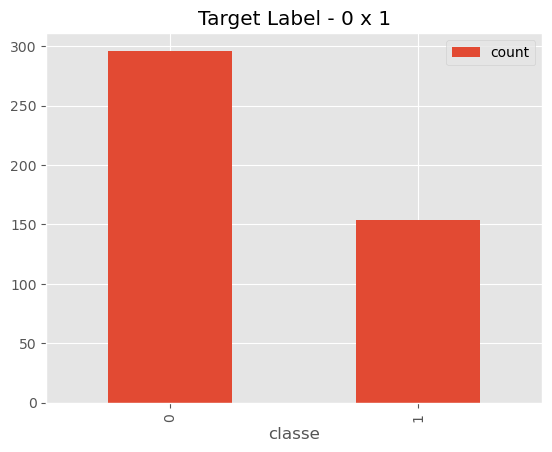

In [95]:
# verificar quantidade de labels por target
df['classe'].value_counts().plot.bar()
plt.title('Target Label - 0 x 1')
plt.legend()
plt.show()

# Exploratory Analisys

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 108 to 595
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   numerical_pipe__insulina           450 non-null    float64
 1   numerical_pipe__pressao_sanguinea  450 non-null    float64
 2   numerical_pipe__glicose            450 non-null    float64
 3   numerical_pipe__bmi                450 non-null    float64
 4   numerical_pipe__num_gestacoes      450 non-null    float64
 5   numerical_pipe__grossura_pele      450 non-null    float64
 6   numerical_pipe__indice_historico   450 non-null    float64
 7   numerical_pipe__idade              450 non-null    float64
 8   classe                             450 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 35.2 KB


# Check NA values

<Axes: >

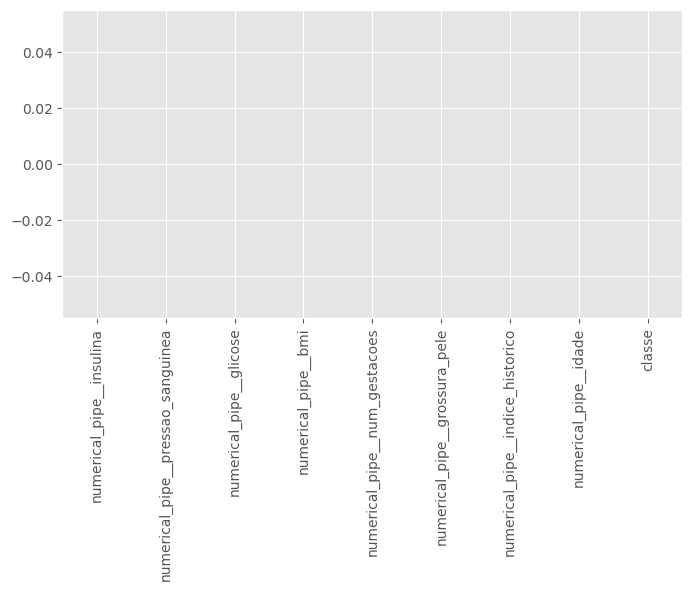

In [97]:
df.isna().mean().plot.bar(figsize=(8,4))

# Check Cardinality

In [98]:
for col in cat_var:
    print('labels por variável: ' + col + ' ' + str(df[col].nunique()))

In [99]:
for col in num_var:
    print('Numero de labels por variável na coluna: ' + col + ' ' + str(df[col].nunique()))

Numero de labels por variável na coluna: numerical_pipe__insulina 323
Numero de labels por variável na coluna: numerical_pipe__pressao_sanguinea 57
Numero de labels por variável na coluna: numerical_pipe__glicose 128
Numero de labels por variável na coluna: numerical_pipe__bmi 216
Numero de labels por variável na coluna: numerical_pipe__num_gestacoes 11
Numero de labels por variável na coluna: numerical_pipe__grossura_pele 111
Numero de labels por variável na coluna: numerical_pipe__indice_historico 350
Numero de labels por variável na coluna: numerical_pipe__idade 50
Numero de labels por variável na coluna: classe 2


# Drop constant features

# nao tem variável constante

In [100]:
# renew dtype
num_var = df.select_dtypes(include=['number']).columns
cat_var = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Graphs

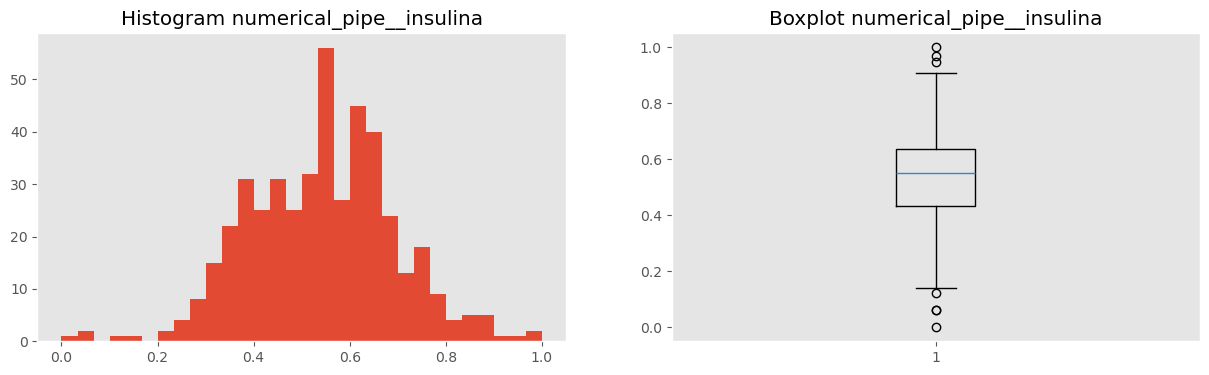

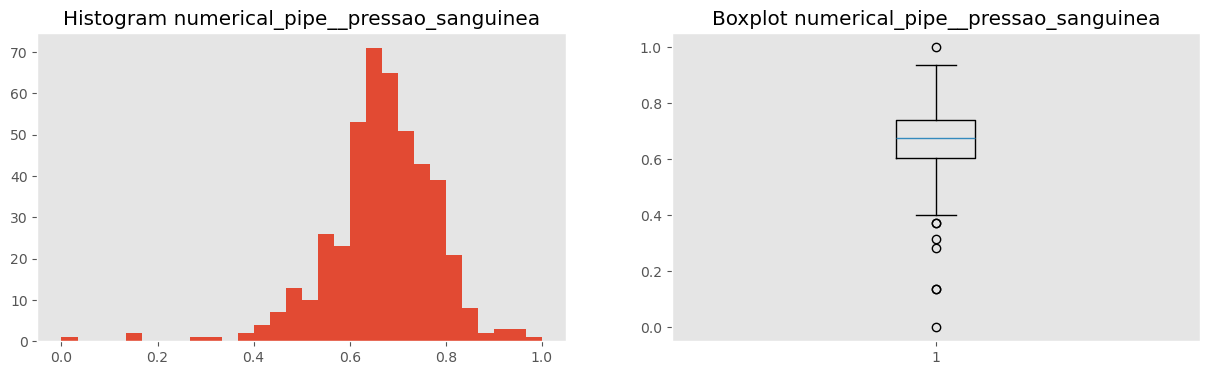

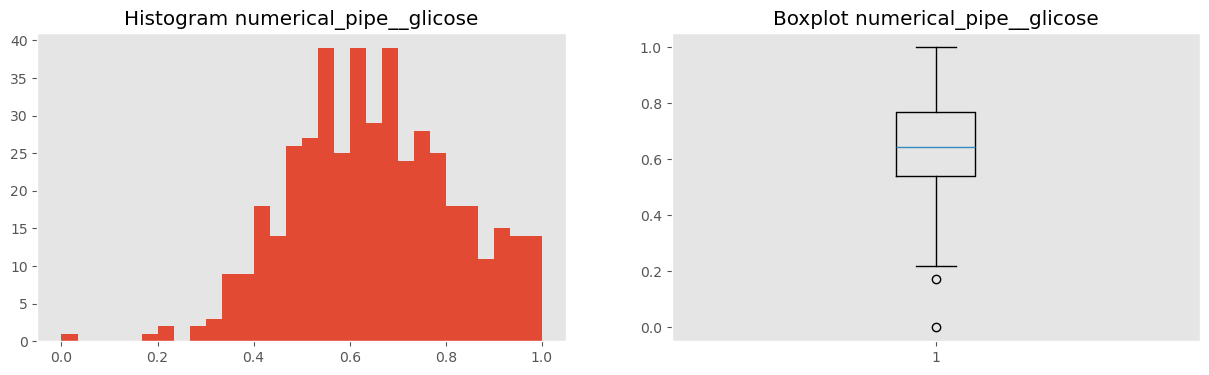

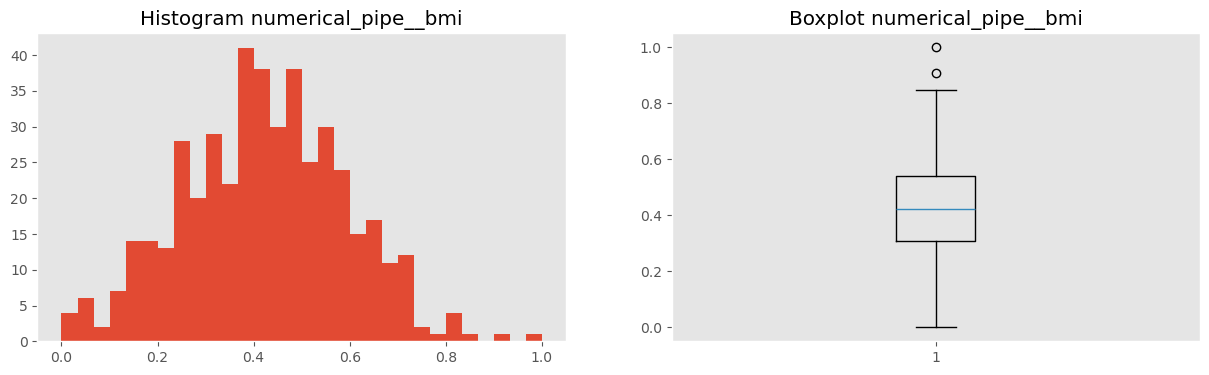

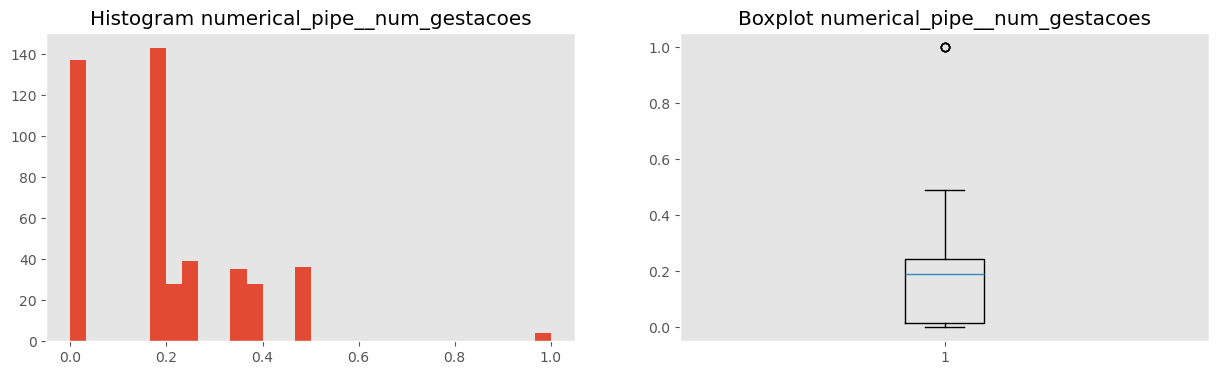

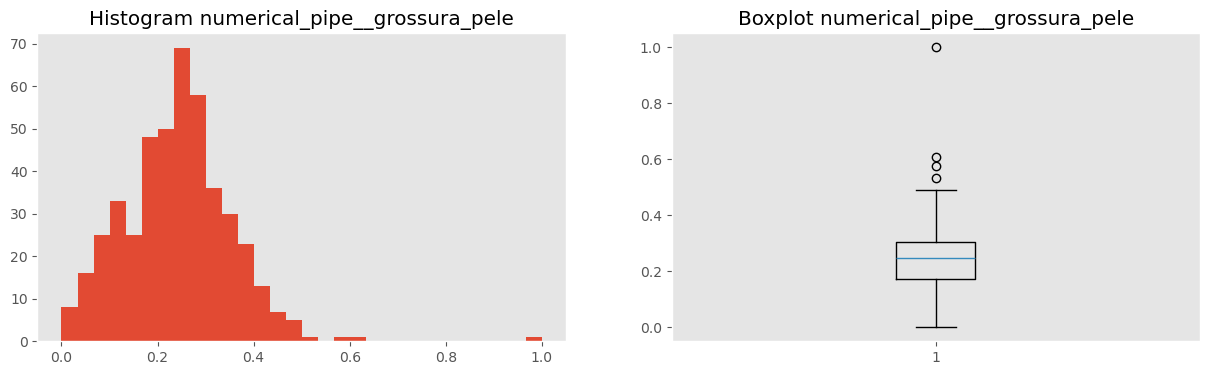

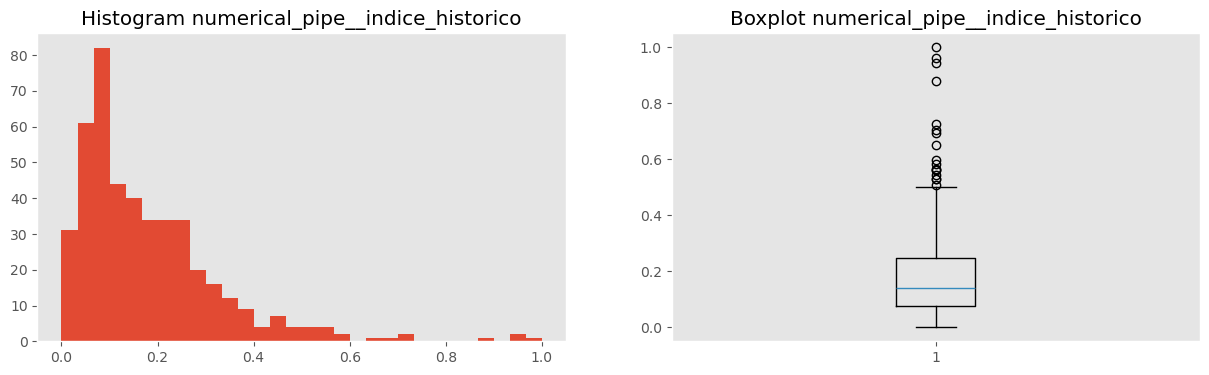

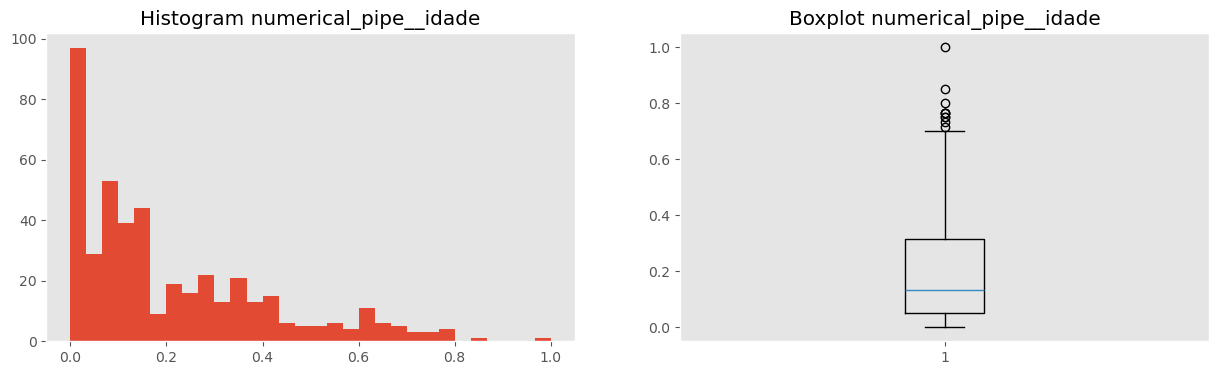

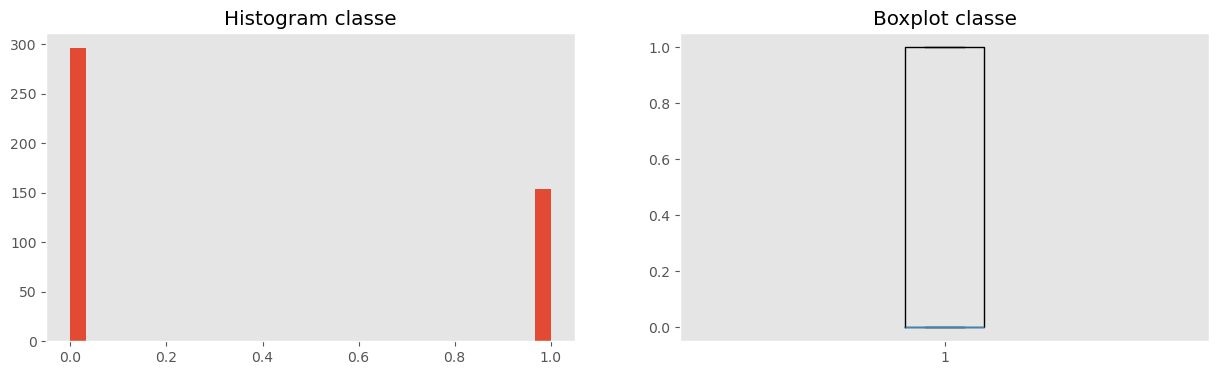

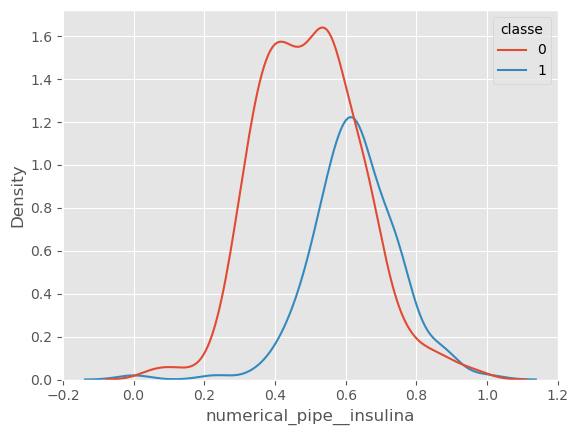

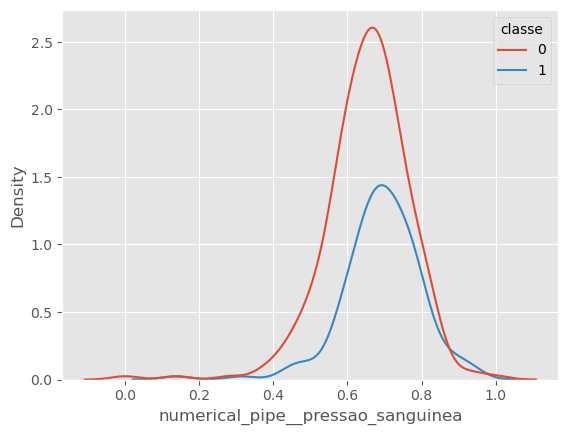

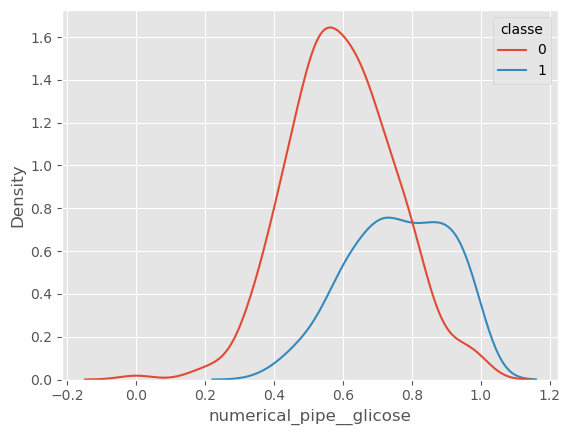

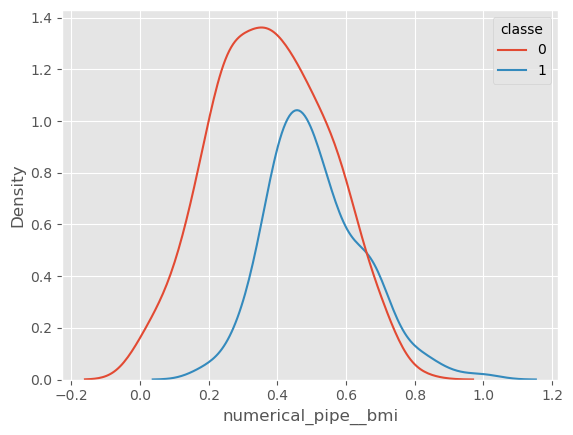

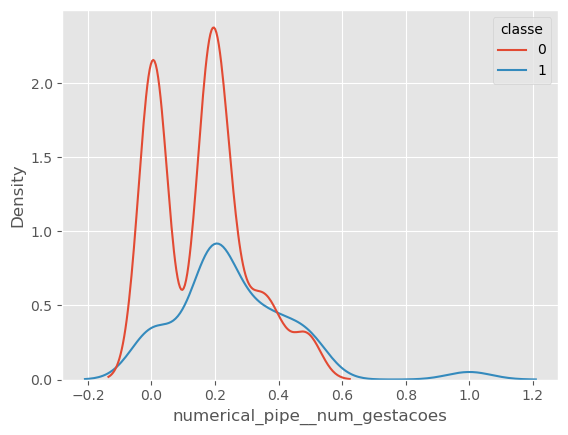

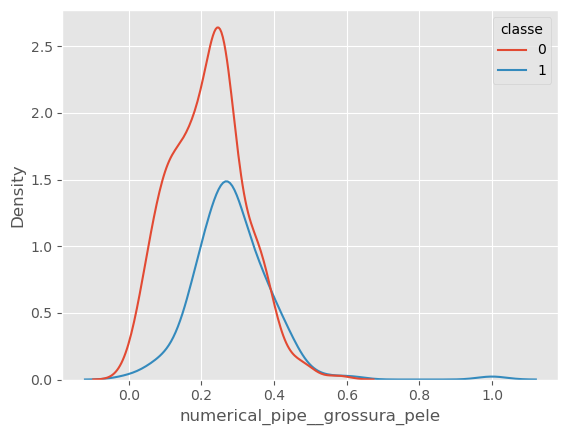

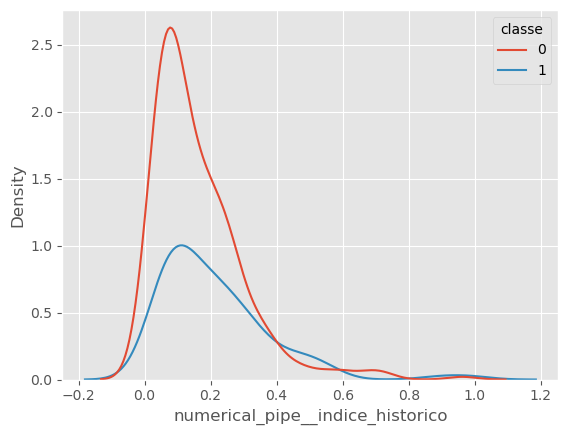

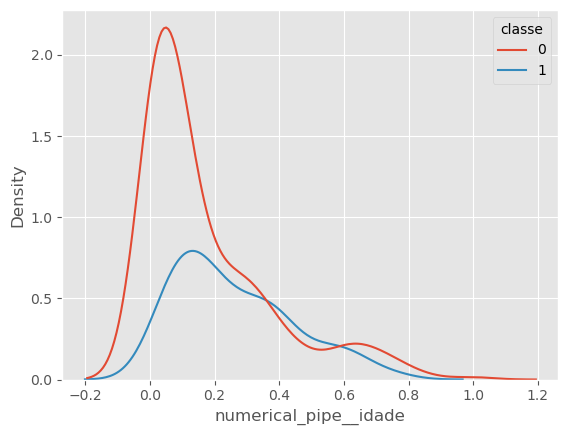

C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\dsa\dsa_single_model\utils\graphs.py:61: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


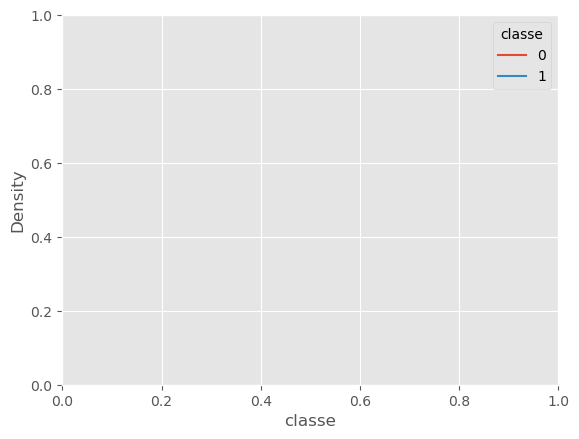

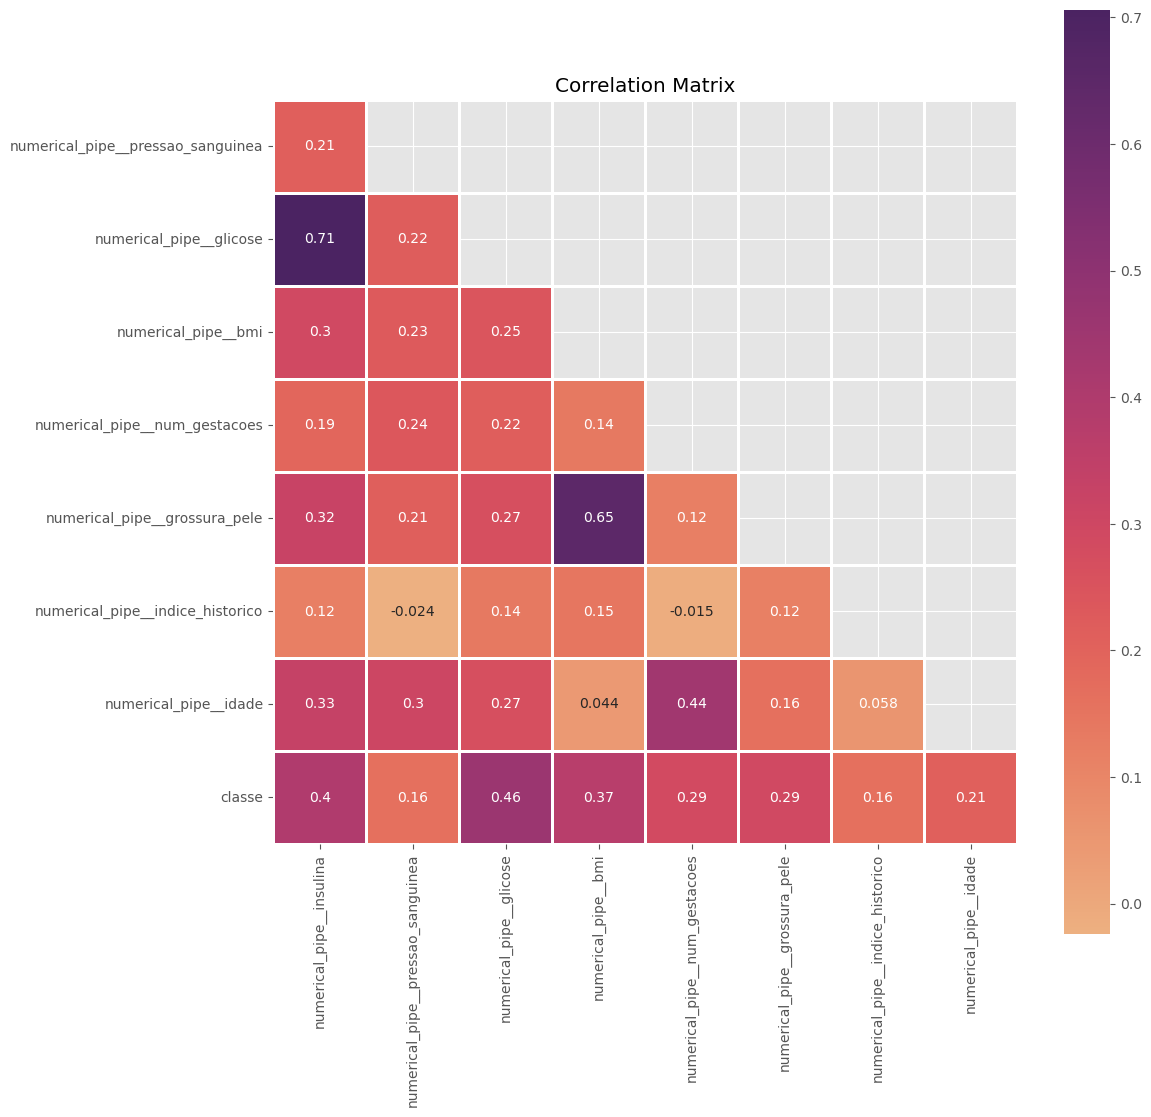

In [101]:
plot_numerical_data(df, target="classe")

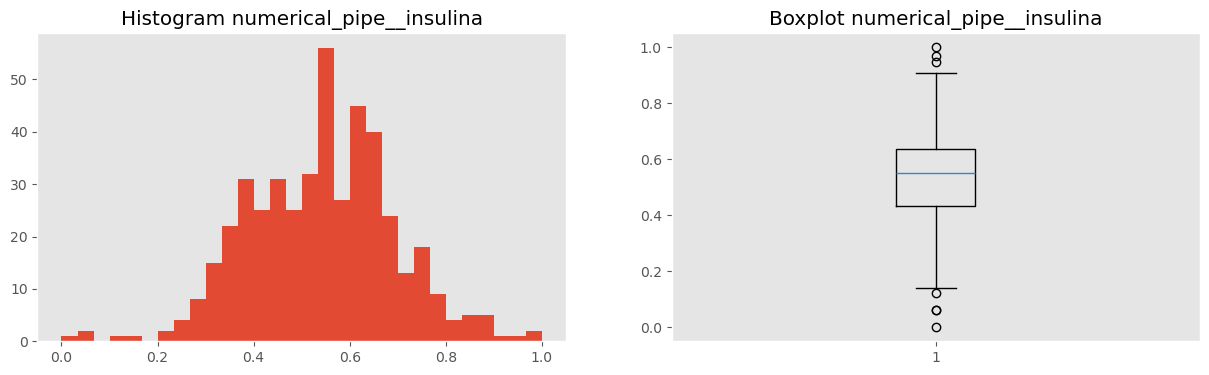

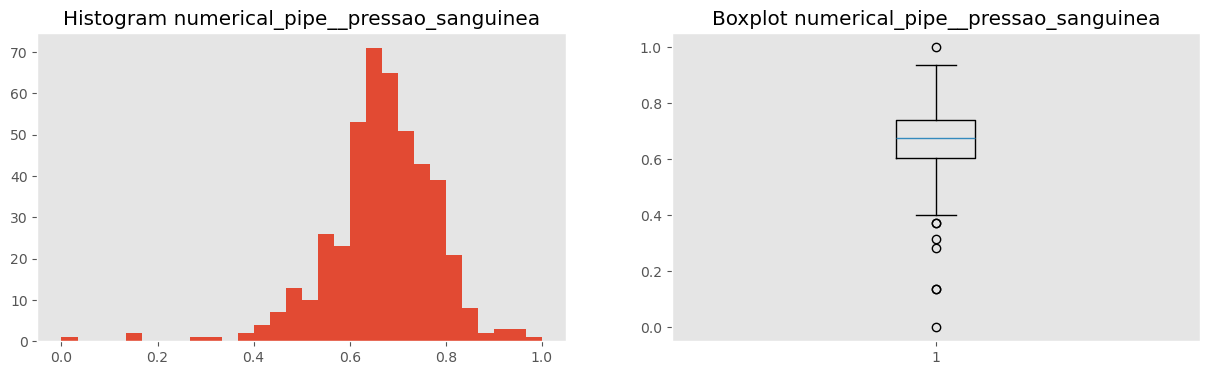

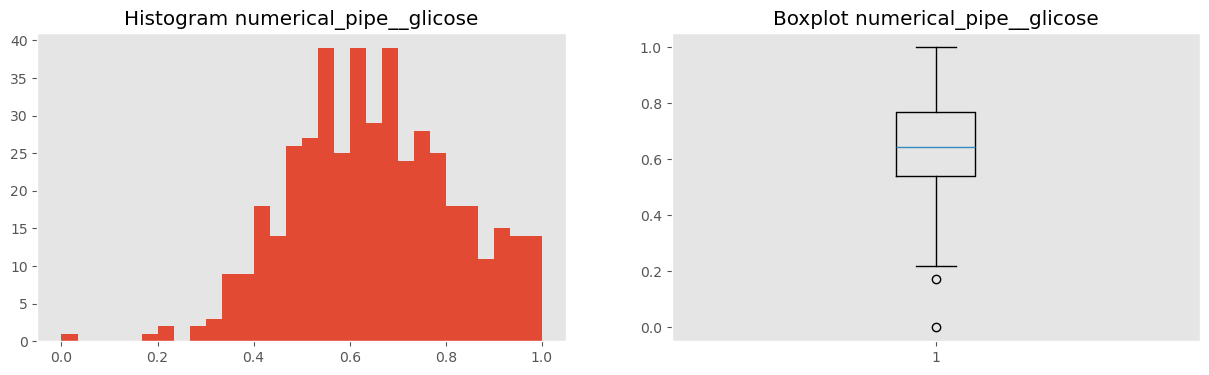

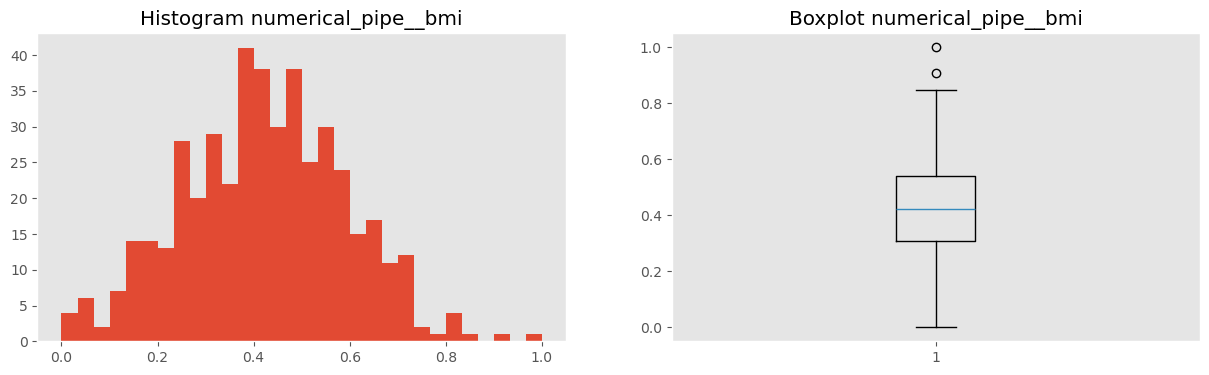

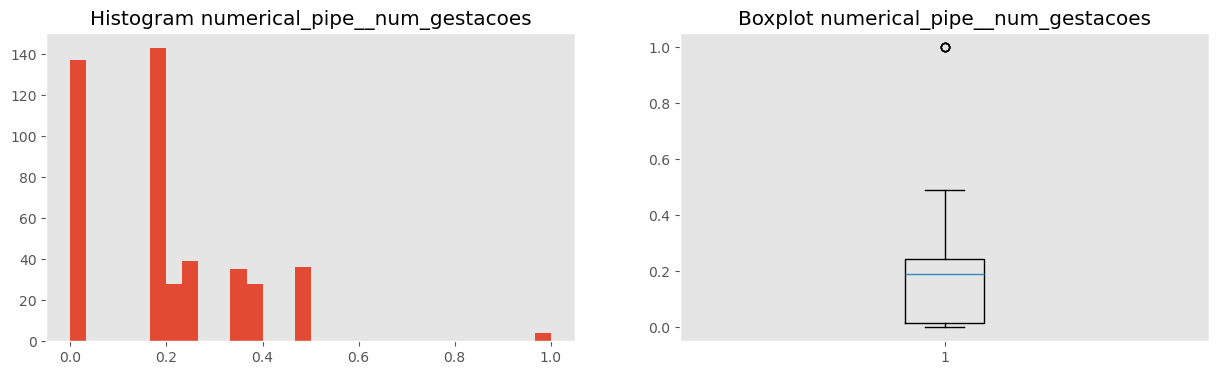

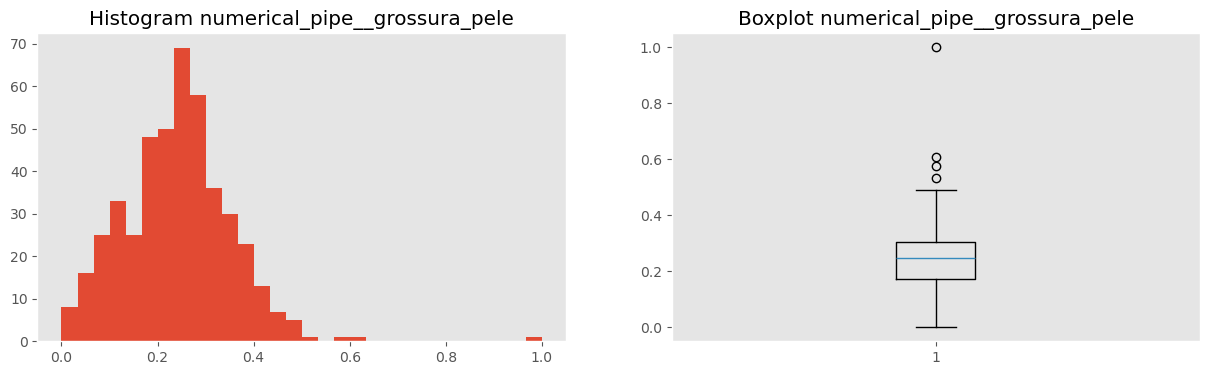

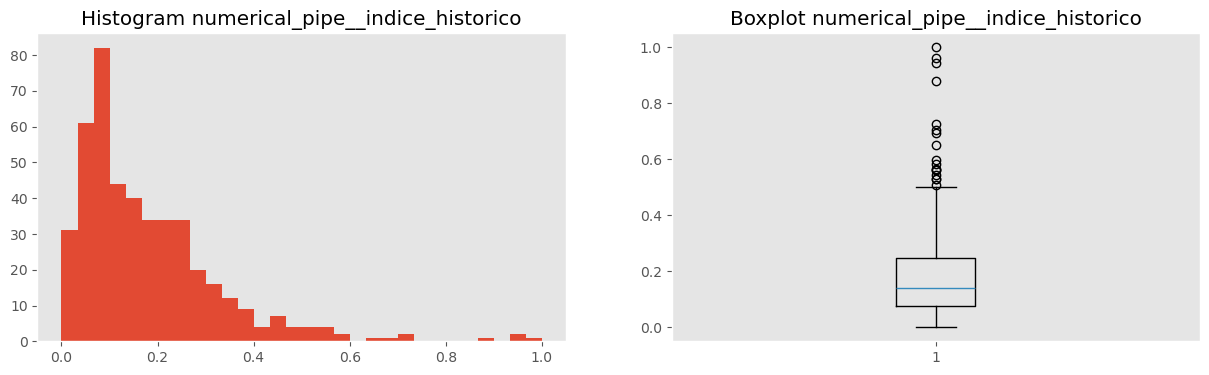

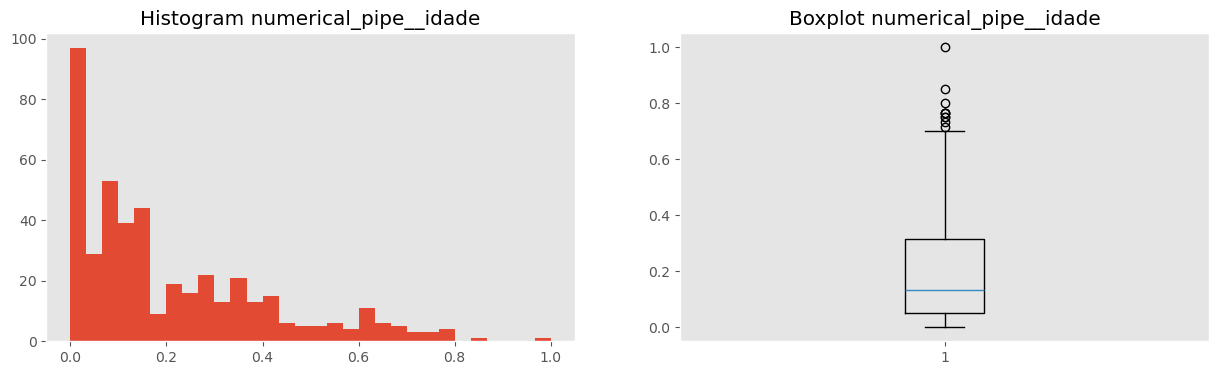

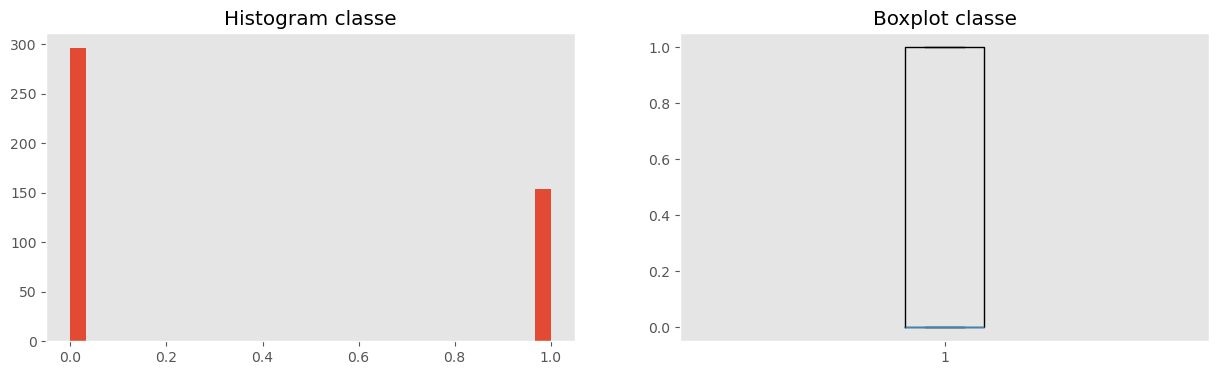

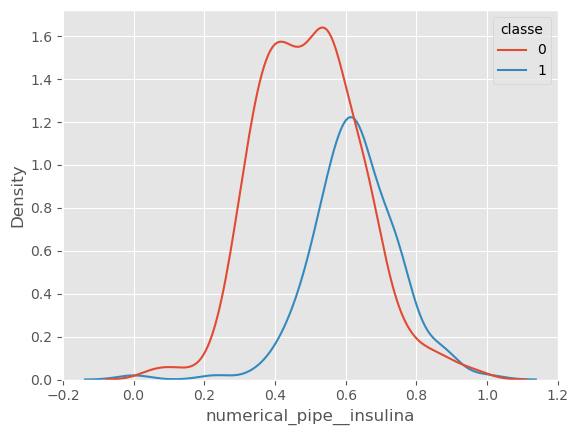

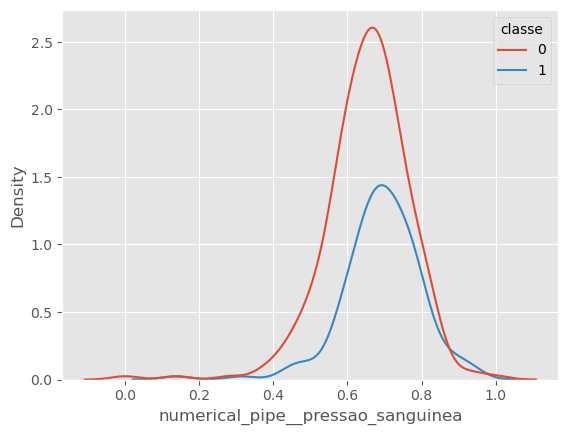

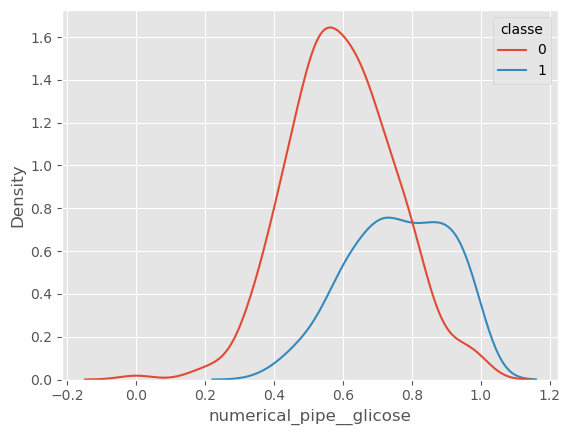

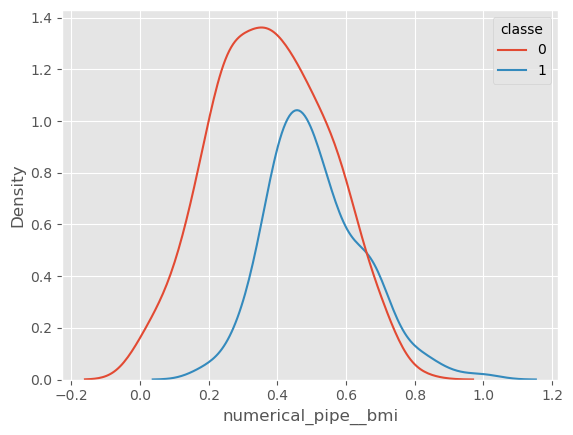

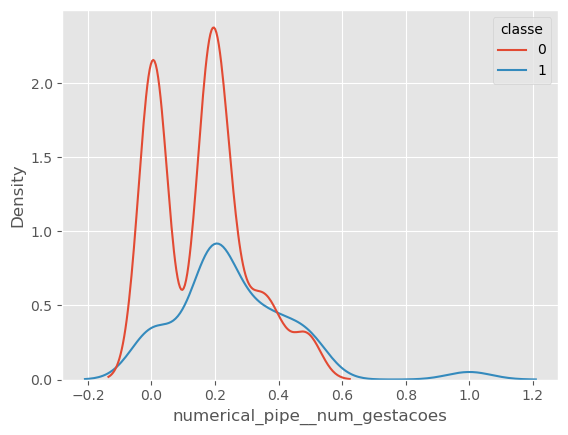

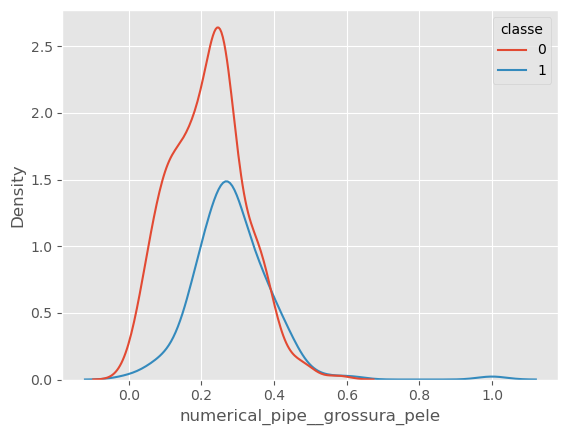

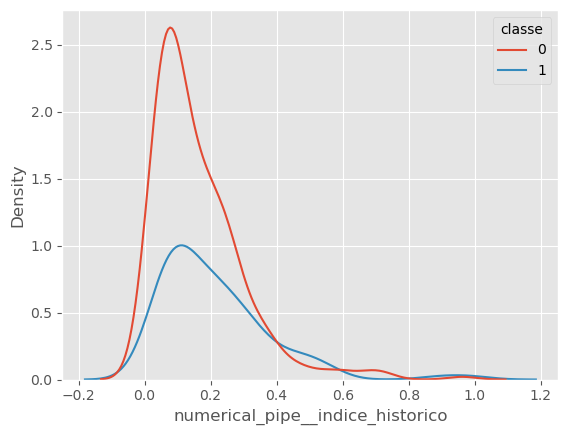

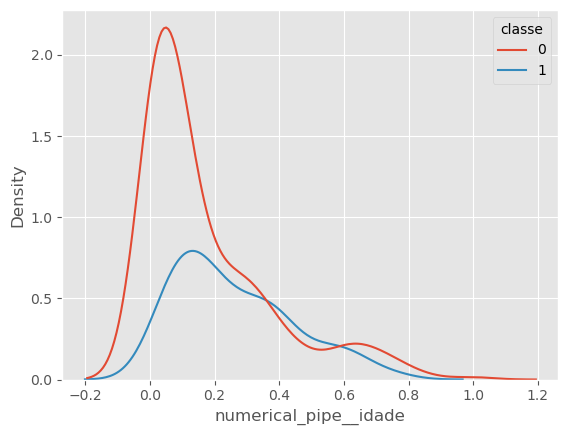

C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\dsa\dsa_single_model\utils\graphs.py:61: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


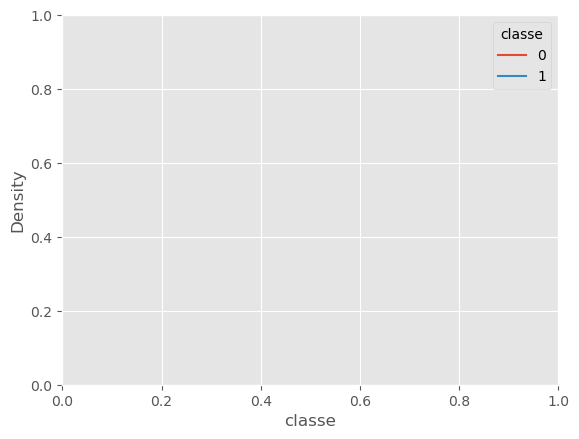

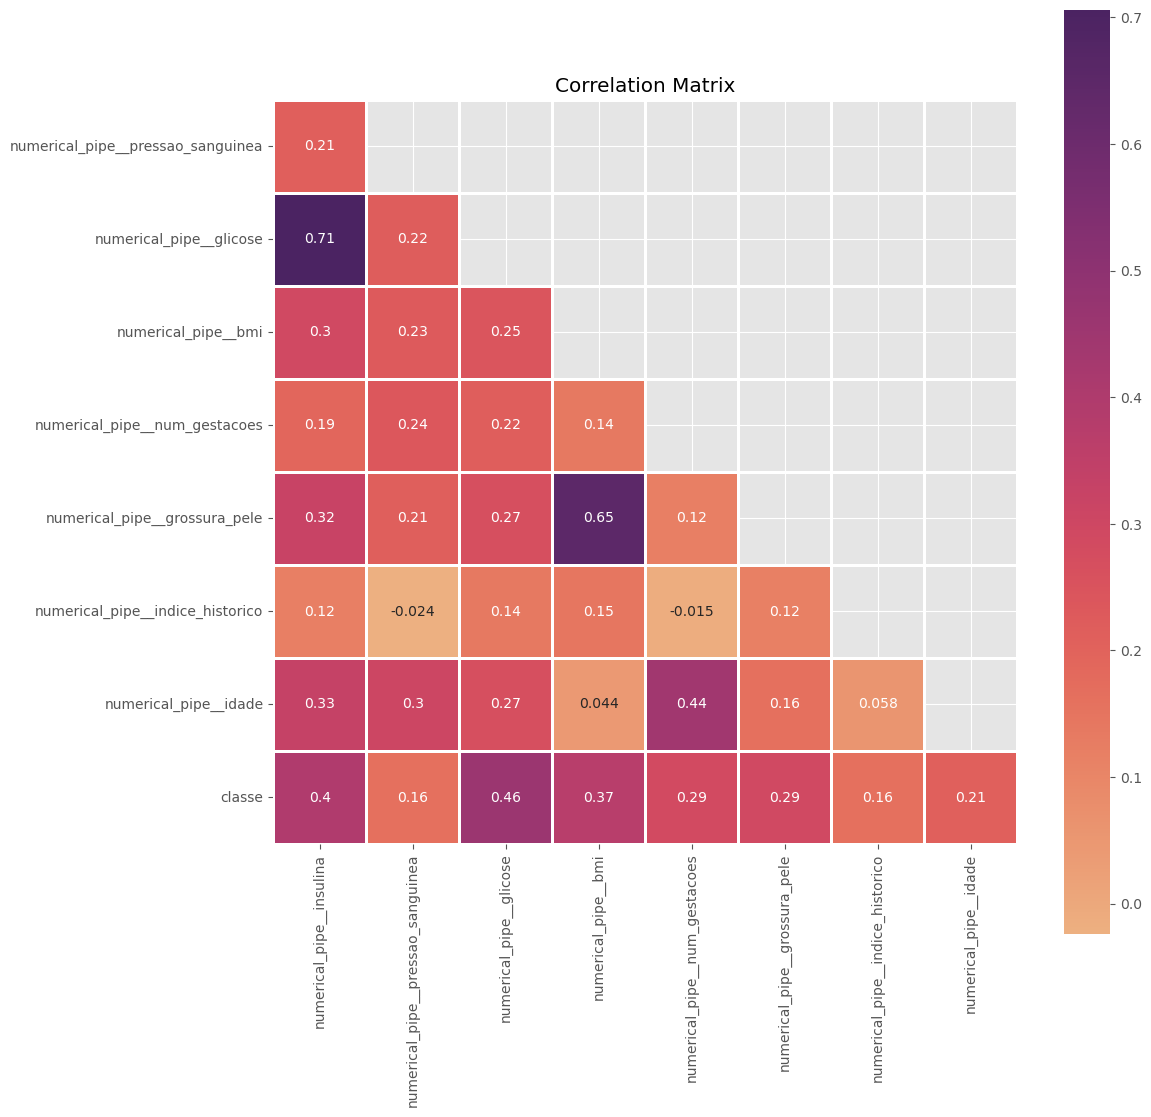

In [102]:
plot_numerical_data(df, target="classe")